Bu egzersiz oturumunda, dolandırıcı kredi kartı işlemlerini tanımak için iki popüler sınıflandırma modeli olan Karar Ağaçları ve Destek Vektör Makineleri'ni kullanarak makine öğrenimi becerilerinizi pekiştireceksiniz. Eylül 2013'te Avrupa kart sahipleri tarafından yapılan kredi kartı işlemlerine dair gerçek bir veri seti kullanarak, her iki modeli eğitecek ve bir kredi kartı işleminin meşru mu yoksa dolandırıcılık mı olduğunu değerlendireceksiniz. Ayrıca, Scikit-Learn Python arayüzü ile birlikte IBM'in yüksek performanslı Snap Machine Learning kütüphanesinin Python API'sini de kullanarak, ML algoritmalarını CPU/GPU üzerinde hızlandıracak ve en iyi doğrulukta sonuçlar elde edeceksiniz.

# 1. Gerekli Kütüphanelerin Kurulumu

In [4]:
!pip install opendatasets
!pip install snapml

# 2. Veri Setinin Okunması

In [20]:
import pandas as pd

a = pd.read_csv('creditcard.csv')
print("Toplam satir sayısı: ", len(a))
print("Toplam sutun sayısı: ", len(a.columns))
a.head()

Toplam satir sayısı:  56874
Toplam sutun sayısı:  31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,10,0.385,0.616,-0.874,-0.094,2.925,3.317,0.470,0.538,-0.559,...,0.050,0.238,0.009,0.997,-0.767,-0.492,0.042,-0.054,9.99,0
1,12,-0.752,0.345,2.057,-1.469,-1.158,-0.078,-0.609,0.004,-0.436,...,0.500,1.354,-0.257,-0.065,-0.039,-0.087,-0.181,0.129,15.99,0
2,25,1.114,0.086,0.494,1.336,-0.300,-0.011,-0.119,0.189,0.206,...,-0.053,-0.005,-0.031,0.198,0.565,-0.338,0.029,0.004,4.45,0
3,33,-0.936,0.170,2.746,-1.078,-0.306,0.012,-0.296,0.403,-0.040,...,0.401,1.065,-0.158,0.296,-0.259,0.754,0.047,0.094,9.10,0
4,35,1.199,0.130,0.864,1.003,-0.784,-0.885,-0.041,-0.208,0.392,...,-0.042,0.198,-0.033,1.013,0.559,0.402,-0.006,0.018,0.99,0


# 3. Veri Setini Büyütmek


In [6]:
import numpy as np

n_replicas = 10

b = pd.DataFrame(np.repeat(a.values, n_replicas, axis=0), columns=a.columns)

print("Yeni veri setinin gözlem sayısı: ", len(b))

Yeni veri setinin gözlem sayısı:  568740


Amaç: Veri setinin boyutunu artırarak daha fazla gözlemle çalışmak olabilir. 

Veri seti, model eğitimi öncesinde çoğaltılır. 

Genellikle, modelin daha iyi öğrenmesi için yeterli miktarda veriye ihtiyaç duyulur. 

Özellikle az sayıda gözlem bulunan sınıflar için bu yöntem yararlı olabilir.

np.repeat fonksiyonu, mevcut verileri belirtilen sayıda (bu örnekte n_replicas = 10) tekrar ederek yeni bir veri seti oluşturur. 

a veri setindeki her bir satırı 10 kez (veya belirttiğin n_replicas sayısı kadar) tekrarlar.

# 4. Hedef Değişkenin İncelenmesi


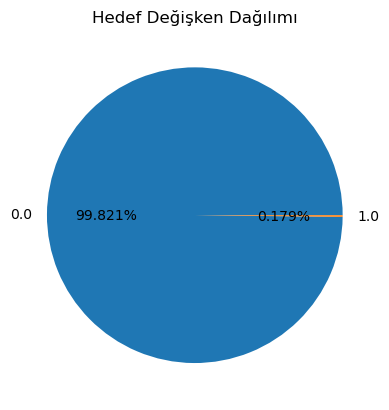

In [7]:
import matplotlib.pyplot as plt

labels = b.Class.unique()
sizes = b.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Hedef Değişken Dağılımı')
plt.show()


b veri setinin Class sütunundaki benzersiz değerleri (sınıfları) alır.

Class sütunu, her bir kredi kartı işleminin sahte (fraudulent) veya gerçek (legitimate) olduğunu belirten sınıf etiketlerini içerir.

unique() fonksiyonu ile bu sütundaki benzersiz sınıflar elde edilir. Örneğin, bu sınıflar genellikle 0 (gerçek işlem) ve 1 (sahte işlem) olur.

Grafik, her sınıfın (örneğin, dolandırıcılık ve dolandırıcılık olmayan işlemler) veri setindeki oranlarını gösterir. Bu bilgi, veri dengesizliği olup olmadığını anlamak için önemlidir. Dengesiz bir veri seti, modelin öğrenme sürecini olumsuz etkileyebilir, bu yüzden böyle bir dağılım analizi yapmak, modelin performansını artırmak için gerekli olabilir.

# 5. İşlem Miktarının Dağılımı


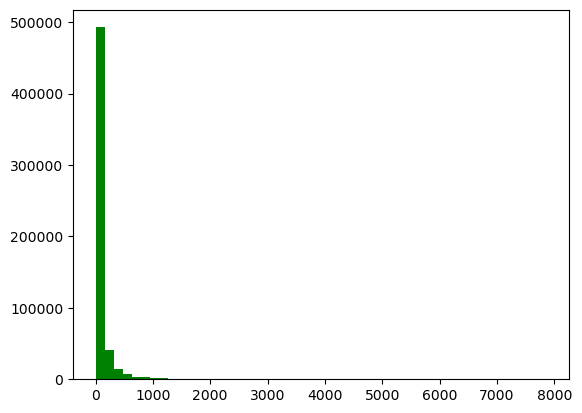

Minimum işlem miktarı:  0.0
Maksimum işlem miktarı:  7862.39
İşlem miktarlarının %90'ı:  204.98


In [8]:
plt.hist(b.Amount.values, bins=50, color='g')
plt.show()

print("Minimum işlem miktarı: ", np.min(b.Amount.values))
print("Maksimum işlem miktarı: ", np.max(b.Amount.values))
print("İşlem miktarlarının %90'ı: ", np.percentile(a.Amount.values, 90))


# 6. Veri Ön İşleme


In [9]:
from sklearn.preprocessing import StandardScaler, normalize

b.iloc[:, 1:30] = StandardScaler().fit_transform(b.iloc[:, 1:30])
data_matrix = b.values

X = data_matrix[:, 1:30]
y = data_matrix[:, 30]

X = normalize(X, norm="l1")
print('X.shape=', X.shape, 'y.shape=', y.shape)


X.shape= (568740, 29) y.shape= (568740,)


veriyi standartlaştırma ve normalleştirme işlemlerini gerçekleştirir.

Bu kodun amacı, makine öğrenimi modeli için veriyi ön işlemek ve hazırlamaktır. 

Özelliklerin Standartlaştırılması: Modelin performansını artırmak için özelliklerin ortalaması 0 ve standart sapmasını 1 yapilir

Veri Matrisinin Oluşturulması: Verinin NumPy dizisi formatına dönüştürülmesi, böylece modelleme işlemleri için daha hızlı ve verimli bir şekilde işlenebilmesi.

Eğitim ve Etiketlerin Ayrılması: Özellikler (X) ve etiketler (y) olarak verinin ayrılması, modelin eğitilmesi için gerekli olan giriş ve çıkış verilerinin belirlenmesi.

Normalleştirme: Özelliklerin toplamının 1 olacak şekilde ölçeklendirilmesi, modelin daha iyi genelleme yapabilmesi için verilerin homojen hale getirilmesi.

Bu adımlar, genellikle aşağıdaki süreçlerin ardından gerçekleştirilir:

Veri Yükleme - Veri Keşfi ve Analizi - Öznitelik Seçimi ve Temizleme

Bu adımlar tamamlandıktan sonra, veriyi standartlaştırmak, normalleştirmek ve eğitim/test setlerine ayırmak için yukarıdaki işlemler yapılır. Bu süreçler, modelin eğitilmesi için gerekli olan temiz ve uygun veri setini oluşturmak amacıyla gerçekleştirilir.

# 7. Veri Setinin Bölünmesi


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('X_train.shape=', X_train.shape, 'y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'y_test.shape=', y_test.shape)


X_train.shape= (398118, 29) y_train.shape= (398118,)
X_test.shape= (170622, 29) y_test.shape= (170622,)


 veri setini eğitim ve test olarak ikiye ayırır

# 8. Ağırlıkların Hesaplanması


In [21]:
from sklearn.utils.class_weight import compute_sample_weight

w_train = compute_sample_weight('balanced', y_train)

# 9. Karar Ağacı Modelinin Eğitilmesi


In [19]:
from sklearn.tree import DecisionTreeClassifier
import time

sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Eğitim süresi (s): {0:.5f}".format(sklearn_time))



from snapml import DecisionTreeClassifier

snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time() - t0
print("[Snap ML] Eğitim süresi (s): {0:.5f}".format(snapml_time))

[Scikit-Learn] Eğitim süresi (s): 6.17610
[Snap ML] Eğitim süresi (s): 0.66675


modellerin eğitim süresi ölçülür.

Model Sınıflandırdı
işlem başlamadan önce geçerli zaman damgasını alarak t0 değişkenine atar.
Modeli Eğitti
Tahmin Yapma Zamanını Ölçtü
Sonuçları Yazdırdı

# 10. Model Performansının Değerlendirilmesi


In [14]:
from sklearn.metrics import roc_auc_score

sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC skoru: {0:.3f}'.format(sklearn_roc_auc))

snapml_pred = snapml_dt.predict_proba(X_test)[:,1]
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC skoru: {0:.3f}'.format(snapml_roc_auc))

[Scikit-Learn] ROC-AUC skoru: 0.997
[Snap ML] ROC-AUC skoru: 0.997


Scikit-Learn ve Snap ML ile eğitilen Karar Ağacı modellerinin performansını ROC-AUC skoru ile karşılaştırildi.

ROC-AUC skoru, pozitif sınıfın doğru sınıflandırılma performansını ölçer. Skor ne kadar yüksekse, modelin performansı o kadar iyidir.

Bu karşılaştırma ile Snap ML ve Scikit-Learn kütüphanelerinin aynı modelde nasıl performans gösterdiğini anlayabilirsiniz. 

# 11. Destek Vektör Makineleri Modelinin Eğitilmesi


In [15]:
from sklearn.svm import LinearSVC

sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Eğitim süresi (s): {0:.2f}".format(sklearn_time))

from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
t0 = time.time() #Snap ML modelinin eğitim süresi ölçümüne başlanır.
snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0 #Snap ML modelinin eğitim süresi hesaplanır.
print("[Snap ML] Eğitim süresi (s): {0:.2f}".format(snapml_time))


[Scikit-Learn] Eğitim süresi (s): 9.21
[Snap ML] Eğitim süresi (s): 2.80


Bu kod, Scikit-Learn ve Snap ML kütüphaneleriyle bir Support Vector Machine (SVM) modelini eğitmek ve eğitim sürelerini karşılaştırmak amacıyla yazılmıştır. 

 Bu kod, Snap ML’in eğitim süresinde Scikit-Learn'e göre ne kadar avantaj sağladığını göstermek için kullanılır.

 Bu şekilde, Snap ML’in daha hızlı sonuçlar üretip üretmediği ve aynı performansı daha kısa sürede sağlayıp sağlamadığı gözlemlenebilir.

# 12. Model Performansının Değerlendirilmesi


In [16]:
sklearn_pred = sklearn_svm.decision_function(X_test)
acc_sklearn = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC skoru: {0:.3f}".format(acc_sklearn))

snapml_pred = snapml_svm.decision_function(X_test)
acc_snapml = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC skoru: {0:.3f}".format(acc_snapml))


[Scikit-Learn] ROC-AUC skoru: 0.995
[Snap ML] ROC-AUC skoru: 0.995


Scikit-Learn ve Snap ML kütüphaneleriyle eğitilen SVM (Support Vector Machine) modellerinin performansı ROC-AUC metriği kullanılarak karşılaştırılmaktadır.

ROC-AUC, sınıflandırma problemlerinde yaygın olarak kullanılan bir performans metriğidir.

(X_test) örnekler için sınıflandırma kararlarını (decision function) hesaplar.

# 13. Hinge Kaybının Hesaplanması


In [17]:
from sklearn.metrics import hinge_loss

loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge kaybı: {0:.3f}".format(loss_snapml))

loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge kaybı: {0:.3f}".format(loss_sklearn))


[Snap ML] Hinge kaybı: 0.393
[Scikit-Learn] Hinge kaybı: 0.402


Bu kodun amacı, Snap ML ve Scikit-Learn kütüphaneleri tarafından yapılan tahminlerin performansını karşılaştırmakiçin hinge loss (hinge kaybı) metriğini kullanmaktır.

hinge_loss fonksiyonu, tahminlerin kalitesini ölçer. 

Gerçek etiketlerle (y_test) modelin tahmin ettiği etiketler (snapml_pred) arasındaki farkı ölçerek modelin ne kadar iyi performans gösterdiğini gösterir. 

Snap ML modelinin ne kadar iyi performans gösterdiği hakkında bilgi verir. 

Daha düşük bir hinge loss, modelin daha iyi performans gösterdiği anlamına gelir.

diger adımda ise Scikit-Learn ile eğitilen modelin tahminleri (sklearn_pred) ile gerçek etiketler (y_test) arasındaki fark kullanılarak hinge loss hesaplanır.